In [4]:
import tensorflow as tf
import os,shutil
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Dropout,Flatten, Dense 
np.set_printoptions(threshold=np.inf)
from tensorflow.keras import Model

In [5]:
original_dataset_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/train'
base_dir='D:/机器学习+毕设+java资料/吴恩达/cat vs dog/dc/find_cats_and_dogs'
train_dir=os.path.join(base_dir,'train')

validation_dir=os.path.join(base_dir,'validaiton')

test_dir=os.path.join(base_dir,'test')

train_cats_dir = os.path.join(train_dir, 'cats')

train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')

validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')

test_dogs_dir = os.path.join(test_dir, 'dogs')

In [6]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 6000
total training dog images: 6000
total validation cat images: 2000
total validation dog images: 2000
total test cat images: 2000
total test dog images: 2000


In [7]:
from keras.preprocessing.image import ImageDataGenerator
# 训练数据的增强
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# 不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # 目标目录
    target_size=(150,150),  # 大小调整
    batch_size=16,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode="binary"
)


Found 12000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [8]:
#数据增强处理
datagen = ImageDataGenerator(
    rotation_range=40,  # 0-180的角度值
    width_shift_range=0.2,  # 水平和垂直方向的范围；相对于总宽度或者高度的比例
    height_shift_range=0.2,
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 图像随机缩放的角度
    horizontal_flip=True,  # 随机将一半图像进行水平翻转
    fill_mode="nearest"  # 用于填充新创建像素的方法
)

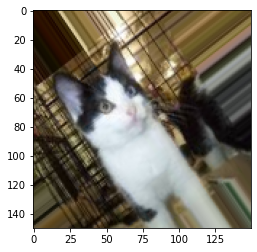

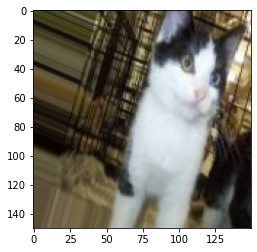

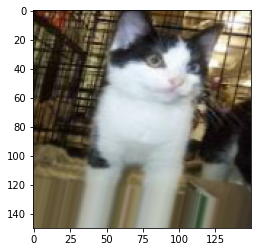

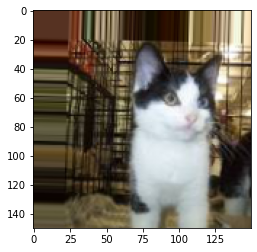

In [9]:
#数据增强
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
# 读取图片并调整大小
img = image.load_img(img_path, target_size=(150,150))  
# 转成数组
x = image.img_to_array(img)

# shape转成(1,150,150,3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):  # 生成随机变换后的图像批量
    plt.figure()   
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break  # 循环是无限，需要在某个时刻终止
        
plt.show()

In [7]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96,kernel_size=(3,3),input_shape=(150,150,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),
    
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),
    
    tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
             metrics=['accuracy'])
checkpoint_save_path="./checkpoint/AlexNet.ckpt"
if os.path.exists(checkpoint_save_path+'.index'):
    print("--------加载模型---------")
    model.load_weights(checkpoint_save_path)
cp_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                              save_weights_only=True,
                                              save_best_only=True)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 96)      384       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 71, 71, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 71, 71, 256)       0

In [10]:
history=model.fit(
      train_generator,
      steps_per_epoch=750,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=250,
    callbacks=[cp_callback])

Epoch 1/50
750/750 [==============================] - 112s 136ms/step - loss: 0.6824 - accuracy: 0.5761 - val_loss: 0.6211 - val_accuracy: 0.6463
Epoch 2/50
750/750 [==============================] - 100s 133ms/step - loss: 0.6415 - accuracy: 0.6158 - val_loss: 0.6058 - val_accuracy: 0.6678
Epoch 3/50
750/750 [==============================] - 100s 133ms/step - loss: 0.6110 - accuracy: 0.6565 - val_loss: 0.5496 - val_accuracy: 0.7205
Epoch 4/50
750/750 [==============================] - 98s 131ms/step - loss: 0.5591 - accuracy: 0.7114 - val_loss: 0.5360 - val_accuracy: 0.7387
Epoch 5/50
750/750 [==============================] - 99s 131ms/step - loss: 0.5181 - accuracy: 0.7442 - val_loss: 0.4846 - val_accuracy: 0.7730
Epoch 6/50
750/750 [==============================] - 97s 129ms/step - loss: 0.4846 - accuracy: 0.7652 - val_loss: 0.5000 - val_accuracy: 0.7580
Epoch 7/50
750/750 [==============================] - 100s 133ms/step - loss: 0.4439 - accuracy: 0.7897 - val_loss: 0.4075 - va

Text(0.5, 1.0, 'Training and validation loss')

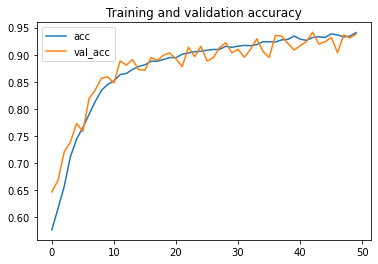

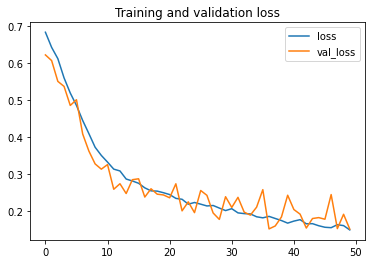

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))
plt.plot  ( epochs,     acc ,label='acc')
plt.plot  ( epochs, val_acc ,label='val_acc')
plt.legend(loc='best')
plt.title ('Training and validation accuracy')
plt.figure()
plt.plot  ( epochs,     loss ,label='loss')
plt.plot  ( epochs, val_loss ,label='val_loss')
plt.legend(loc='best')
plt.title ('Training and validation loss')


In [13]:
model.save("cats_and_dogs_alexnet8-2.h5")

In [1]:
from keras.models import load_model
model = load_model("D:/机器学习+毕设+java资料/吴恩达/cat vs dog/alexnet/cats_and_dogs_alexnet8-2.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 96)      2688      
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 96)      384       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 96)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 71, 71, 256)       221440    
_________________________________________________________________
batch_normalization_1 (Batch (None, 71, 71, 256)       1024      
_________________________________________________________________
activation_1 (Activation)    (None, 71, 71, 256)       0

In [10]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary')

Found 4000 images belonging to 2 classes.


In [11]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

D:\programming\Anaconda\envs\tensorflow2\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9375
